# Energy Usage Analysis Dashboard

This notebook provides comprehensive analysis and visualization of your energy usage data stored in Delta Lake.

## Contents
1. Data Loading & Overview
2. Time Series Analysis
3. Usage Patterns & Trends
4. Cost Estimation
5. Custom Analysis

## 1. Import Required Libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Import our custom storage module
from delta_storage import EnergyDeltaStorage

# Configure display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
warnings.filterwarnings("ignore")

# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Initialize Delta Storage & Get Stats

In [22]:
# Initialize storage
storage = EnergyDeltaStorage("./energy_data")

# Get and display statistics
stats = storage.get_stats()

print("=== Overall Statistics ===")
if "overall" in stats:
    print(f"Total Records: {stats['overall']['total_records']:,}")
    print(
        f"Date Range: {stats['overall']['date_range']['min']} to {stats['overall']['date_range']['max']}"
    )
    print(f"Unique Meters: {stats['overall']['unique_meters']}")
    print(f"Table Version: {stats['overall']['table_version']}")
    print(f"Number of Partitions: {stats['overall']['partition_count']}")

print("\n=== Utility-Specific Statistics ===")
for utility in ["electric", "gas", "water"]:
    if utility in stats:
        u = stats[utility]
        print(f"\n{utility.upper()}:")
        print(f"  Records: {u['total_records']:,}")
        print(f"  Total Usage: {u['total_usage']:.2f} {u['unit']}")
        print(f"  Average Usage: {u['avg_usage']:.2f} {u['unit']}")
        print(f"  Date Range: {u['date_range']['min']} to {u['date_range']['max']}")

=== Overall Statistics ===
Total Records: 5,702
Date Range: 2025-11-13 19:15:00+00:00 to 2025-12-13 14:30:00+00:00
Unique Meters: 2
Table Version: 15
Number of Partitions: 62

=== Utility-Specific Statistics ===

ELECTRIC:
  Records: 2,862
  Total Usage: 1655.24 KWH
  Average Usage: 0.58 KWH
  Date Range: 2025-11-13 19:15:00+00:00 to 2025-12-13 14:30:00+00:00

GAS:
  Records: 2,840
  Total Usage: 1106.00 FT3
  Average Usage: 0.39 FT3
  Date Range: 2025-11-13 19:15:00+00:00 to 2025-12-13 09:00:00+00:00


## 3. Load All Usage Data

In [23]:
# Load all usage data (USAGE only, not COST)
df = storage.read_usage_data(data_type="USAGE")

print(f"Loaded {len(df):,} records")
print(f"\nData shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nUtility types: {df['utility_type'].unique()}")
print(f"\nDate range: {df['datetime_utc'].min()} to {df['datetime_utc'].max()}")

# Display first few rows
df.head(10)

Loaded 5,702 records

Data shape: (5702, 16)

Columns: ['timestamp_ms', 'datetime_utc', 'date', 'year', 'month', 'day', 'hour', 'usage_value', 'unit_of_measure', 'utility_type', 'data_type', 'meter_number', 'service_location_number', 'account_number', 'time_frame', 'ingested_at']

Utility types: ['GAS' 'ELECTRIC']

Date range: 2025-11-13 19:15:00+00:00 to 2025-12-13 14:30:00+00:00


,timestamp_ms,datetime_utc,date,year,month,day,hour,usage_value,unit_of_measure,utility_type,data_type,meter_number,service_location_number,account_number,time_frame,ingested_at
2016,1763061300000,2025-11-13 19:15:00+00:00,2025-11-13,2025,11,13,19,0.00,FT3,GAS,USAGE,69608,5101185035,490118,HOURLY,2025-12-13 19:01:20.207917+00:00
3571,1763061300000,2025-11-13 19:15:00+00:00,2025-11-13,2025,11,13,19,1.23,KWH,ELECTRIC,USAGE,529016,5101185035,490118,HOURLY,2025-12-13 19:01:19.616734+00:00
3572,1763062200000,2025-11-13 19:30:00+00:00,2025-11-13,2025,11,13,19,1.77,KWH,ELECTRIC,USAGE,529016,5101185035,490118,HOURLY,2025-12-13 19:01:19.616813+00:00
2017,1763062200000,2025-11-13 19:30:00+00:00,2025-11-13,2025,11,13,19,0.00,FT3,GAS,USAGE,69608,5101185035,490118,HOURLY,2025-12-13 19:01:20.207978+00:00
3573,1763063100000,2025-11-13 19:45:00+00:00,2025-11-13,2025,11,13,19,1.73,KWH,ELECTRIC,USAGE,529016,5101185035,490118,HOURLY,2025-12-13 19:01:19.616859+00:00
2018,1763063100000,2025-11-13 19:45:00+00:00,2025-11-13,2025,11,13,19,8.00,FT3,GAS,USAGE,69608,5101185035,490118,HOURLY,2025-12-13 19:01:20.208017+00:00
3574,1763064000000,2025-11-13 20:00:00+00:00,2025-11-13,2025,11,13,20,1.72,KWH,ELECTRIC,USAGE,529016,5101185035,490118,HOURLY,2025-12-13 19:01:19.616896+00:00
2019,1763064000000,2025-11-13 20:00:00+00:00,2025-11-13,2025,11,13,20,10.00,FT3,GAS,USAGE,69608,5101185035,490118,HOURLY,2025-12-13 19:01:20.208052+00:00
2020,1763064900000,2025-11-13 20:15:00+00:00,2025-11-13,2025,11,13,20,0.00,FT3,GAS,USAGE,69608,5101185035,490118,HOURLY,2025-12-13 19:01:20.208084+00:00
3575,1763064900000,2025-11-13 20:15:00+00:00,2025-11-13,2025,11,13,20,1.01,KWH,ELECTRIC,USAGE,529016,5101185035,490118,HOURLY,2025-12-13 19:01:19.616931+00:00


## 4. Time Series Visualization - All Utilities

In [24]:
# Create interactive time series plot with Plotly
fig = px.line(
    df,
    x="datetime_utc",
    y="usage_value",
    color="utility_type",
    title="Usage Over Time by Utility Type",
    labels={
        "datetime_utc": "Date/Time",
        "usage_value": "Usage",
        "utility_type": "Utility",
    },
    template="plotly_white",
)

fig.update_layout(
    height=500,
    hovermode="x unified",
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
)

fig.show()

## 5. Daily Usage Patterns

In [25]:
# Aggregate to daily totals
daily_df = (
    df.groupby(
        [pd.Grouper(key="datetime_utc", freq="D"), "utility_type", "unit_of_measure"]
    )
    .agg({"usage_value": "sum"})
    .reset_index()
)

# Create subplots for each utility
utilities = daily_df["utility_type"].unique()
fig = make_subplots(
    rows=len(utilities),
    cols=1,
    subplot_titles=[f"{u} Daily Usage" for u in utilities],
    vertical_spacing=0.1,
)

colors = {"ELECTRIC": "#FF6B6B", "GAS": "#4ECDC4", "WATER": "#45B7D1"}

for i, utility in enumerate(utilities, 1):
    utility_data = daily_df[daily_df["utility_type"] == utility]
    unit = utility_data["unit_of_measure"].iloc[0]

    fig.add_trace(
        go.Bar(
            x=utility_data["datetime_utc"],
            y=utility_data["usage_value"],
            name=utility,
            marker_color=colors.get(utility, "#95E1D3"),
            hovertemplate=f"<b>{utility}</b><br>Date: %{{x}}<br>Usage: %{{y:.2f}} {unit}<extra></extra>",
        ),
        row=i,
        col=1,
    )

    fig.update_yaxes(title_text=f"Usage ({unit})", row=i, col=1)

fig.update_xaxes(title_text="Date", row=len(utilities), col=1)
fig.update_layout(
    height=300 * len(utilities),
    showlegend=False,
    template="plotly_white",
    title_text="Daily Usage by Utility",
)
fig.show()

# Summary statistics
print("\n=== Daily Usage Summary ===")
for utility in utilities:
    utility_daily = daily_df[daily_df["utility_type"] == utility]
    unit = utility_daily["unit_of_measure"].iloc[0]
    print(f"\n{utility}:")
    print(f"  Average daily: {utility_daily['usage_value'].mean():.2f} {unit}")
    print(f"  Max daily: {utility_daily['usage_value'].max():.2f} {unit}")
    print(f"  Min daily: {utility_daily['usage_value'].min():.2f} {unit}")


=== Daily Usage Summary ===

ELECTRIC:
  Average daily: 53.39 KWH
  Max daily: 92.01 KWH
  Min daily: 13.23 KWH

GAS:
  Average daily: 35.68 FT3
  Max daily: 78.00 FT3
  Min daily: 8.00 FT3


## 6. Hourly Usage Patterns (Heatmap)

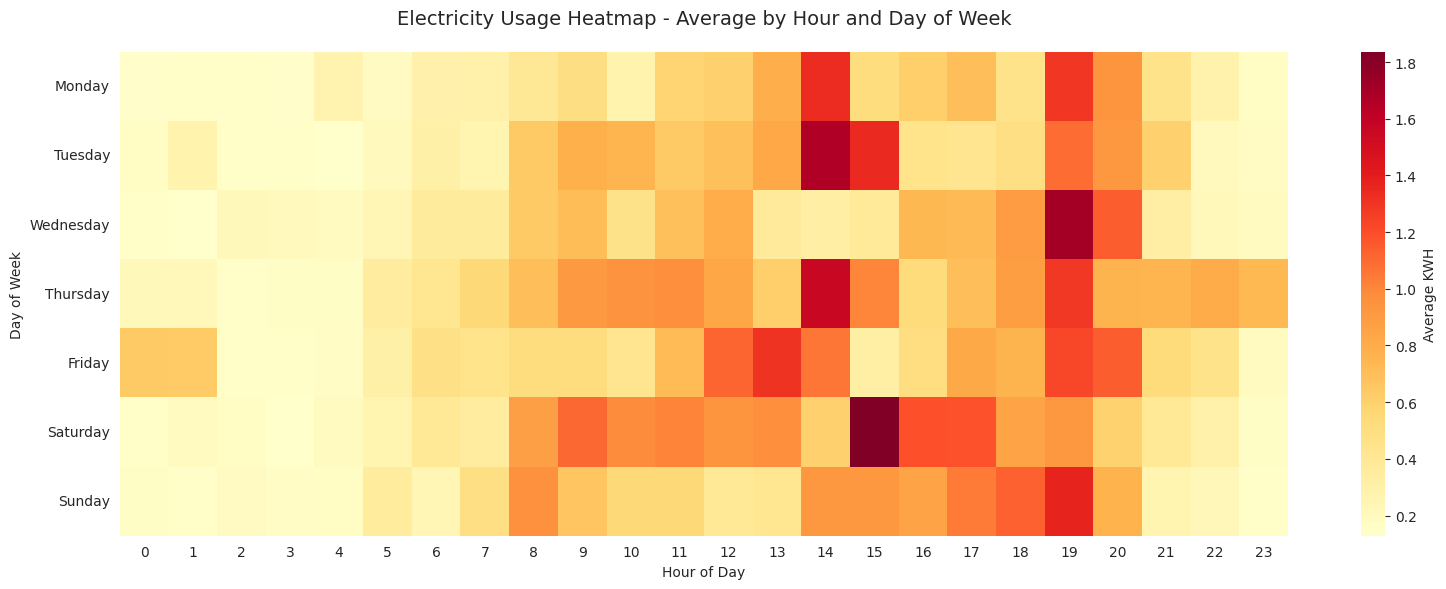

In [26]:
# For electricity data, create hourly heatmap
electric_df = df[df["utility_type"] == "ELECTRIC"].copy()
electric_df["day_of_week"] = electric_df["datetime_utc"].dt.day_name()
electric_df["hour_of_day"] = electric_df["datetime_utc"].dt.hour

# Pivot for heatmap
heatmap_data = electric_df.pivot_table(
    values="usage_value", index="day_of_week", columns="hour_of_day", aggfunc="mean"
)

# Reorder days
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
heatmap_data = heatmap_data.reindex([d for d in day_order if d in heatmap_data.index])

# Create heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    annot=False,
    fmt=".2f",
    cbar_kws={"label": "Average KWH"},
)
plt.title(
    "Electricity Usage Heatmap - Average by Hour and Day of Week", fontsize=14, pad=20
)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

## 7. Comparison: Electricity vs Gas

In [27]:
# Create normalized comparison (scale to 0-100 for comparison)
from sklearn.preprocessing import MinMaxScaler

comparison_df = daily_df.copy()
scaler = MinMaxScaler(feature_range=(0, 100))

# Normalize each utility separately
for utility in comparison_df["utility_type"].unique():
    mask = comparison_df["utility_type"] == utility
    comparison_df.loc[mask, "normalized_usage"] = scaler.fit_transform(
        comparison_df.loc[mask, "usage_value"].values.reshape(-1, 1)
    )

# Plot normalized comparison
fig = px.line(
    comparison_df,
    x="datetime_utc",
    y="normalized_usage",
    color="utility_type",
    title="Normalized Usage Comparison (0-100 scale)",
    labels={
        "datetime_utc": "Date",
        "normalized_usage": "Normalized Usage (0-100)",
        "utility_type": "Utility",
    },
    template="plotly_white",
)

fig.update_layout(height=500, hovermode="x unified")
fig.show()

## 8. Actual Costs from API Data

Now using the actual cost data provided by the utility API.

In [28]:
# Load actual cost data from API
cost_df = storage.read_usage_data(data_type="COST")

print(f"Loaded {len(cost_df):,} cost records")

# Aggregate to daily costs
daily_cost_df = (
    cost_df.groupby([pd.Grouper(key="datetime_utc", freq="D"), "utility_type"])
    .agg(
        {
            "usage_value": "sum"  # usage_value contains dollar amounts for COST data
        }
    )
    .reset_index()
)
daily_cost_df.rename(columns={"usage_value": "cost"}, inplace=True)

# Daily costs by utility
fig = px.bar(
    daily_cost_df,
    x="datetime_utc",
    y="cost",
    color="utility_type",
    title="Actual Daily Costs by Utility (from API)",
    labels={"datetime_utc": "Date", "cost": "Cost ($)", "utility_type": "Utility"},
    template="plotly_white",
)

fig.update_layout(height=500, barmode="stack")
fig.show()

# Summary
print("\n=== Cost Summary ===")
total_cost = 0
for utility in daily_cost_df["utility_type"].unique():
    utility_cost = daily_cost_df[daily_cost_df["utility_type"] == utility]
    daily_avg = utility_cost["cost"].mean()
    total = utility_cost["cost"].sum()
    total_cost += total

    print(f"\n{utility}:")
    print(f"  Total: ${total:.2f}")
    print(f"  Daily Average: ${daily_avg:.2f}")
    print(f"  Projected Monthly: ${daily_avg * 30:.2f}")

print(f"\n{'=' * 40}")
print(f"TOTAL ACTUAL COST: ${total_cost:.2f}")
num_days = len(daily_cost_df["datetime_utc"].unique())
print(f"PROJECTED MONTHLY: ${(total_cost / num_days) * 30:.2f}")
print(f"(Based on {num_days} days of data)")

Loaded 5,702 cost records



=== Cost Summary ===

ELECTRIC:
  Total: $175.33
  Daily Average: $5.66
  Projected Monthly: $169.67

GAS:
  Total: $11.48
  Daily Average: $0.37
  Projected Monthly: $11.11

TOTAL ACTUAL COST: $186.81
PROJECTED MONTHLY: $180.78
(Based on 31 days of data)


## 9. Custom Date Range Analysis

Use the cells below to analyze specific date ranges or utility types.

In [29]:
# Customize these parameters
UTILITY_TYPE = "ELECTRIC"  # Options: "ELECTRIC", "GAS", "WATER", or None for all
START_DATE = None  # e.g., "2025-12-01" or None for all data
END_DATE = None  # e.g., "2025-12-13" or None for all data
DATA_TYPE = "USAGE"  # Options: "USAGE" or "COST"

# Load filtered data
custom_df = storage.read_usage_data(
    utility_type=UTILITY_TYPE,
    start_date=START_DATE,
    end_date=END_DATE,
    data_type=DATA_TYPE,
)

print(f"Loaded {len(custom_df):,} records")
print(
    f"Date range: {custom_df['datetime_utc'].min()} to {custom_df['datetime_utc'].max()}"
)

# Plot
unit_label = (
    "Cost ($)"
    if DATA_TYPE == "COST"
    else f"Usage ({custom_df['unit_of_measure'].iloc[0] if len(custom_df) > 0 else ''})"
)
fig = px.line(
    custom_df,
    x="datetime_utc",
    y="usage_value",
    title=f"{UTILITY_TYPE or 'All Utilities'} {DATA_TYPE} - Custom Date Range",
    labels={"datetime_utc": "Date/Time", "usage_value": unit_label},
    template="plotly_white",
)

fig.update_layout(height=500)
fig.show()

# Statistics
unit_str = (
    "$"
    if DATA_TYPE == "COST"
    else custom_df["unit_of_measure"].iloc[0]
    if len(custom_df) > 0
    else ""
)
print("\n=== Statistics ===")
print(f"Total: {custom_df['usage_value'].sum():.2f} {unit_str}")
print(f"Average: {custom_df['usage_value'].mean():.2f}")
print(f"Max: {custom_df['usage_value'].max():.2f}")
print(f"Min: {custom_df['usage_value'].min():.2f}")

Loaded 2,862 records
Date range: 2025-11-13 19:15:00+00:00 to 2025-12-13 14:30:00+00:00



=== Statistics ===
Total: 1655.24 KWH
Average: 0.58
Max: 4.72
Min: 0.07


## 10. Peak Usage and Cost Analysis

Identify when you're using the most energy and spending the most money.

=== Top 10 Usage Periods by Utility ===


GAS:
             datetime_utc  usage_value unit_of_measure  hour
2025-11-13 20:00:00+00:00         10.0             FT3    20
2025-11-21 19:30:00+00:00         10.0             FT3    19
2025-11-13 19:45:00+00:00          8.0             FT3    19
2025-11-27 08:30:00+00:00          8.0             FT3     8
2025-11-28 08:45:00+00:00          8.0             FT3     8
2025-11-28 09:00:00+00:00          8.0             FT3     9
2025-11-28 14:00:00+00:00          8.0             FT3    14
2025-11-29 07:45:00+00:00          8.0             FT3     7
2025-11-29 14:15:00+00:00          8.0             FT3    14
2025-11-29 14:30:00+00:00          8.0             FT3    14

Average usage by hour of day:
hour
18    0.775862
19    0.722689
14    0.655172
17    0.620690
8     0.600000
Name: usage_value, dtype: float64

ELECTRIC:
             datetime_utc  usage_value unit_of_measure  hour
2025-12-06 15:15:00+00:00         4.72             KWH    15
2025

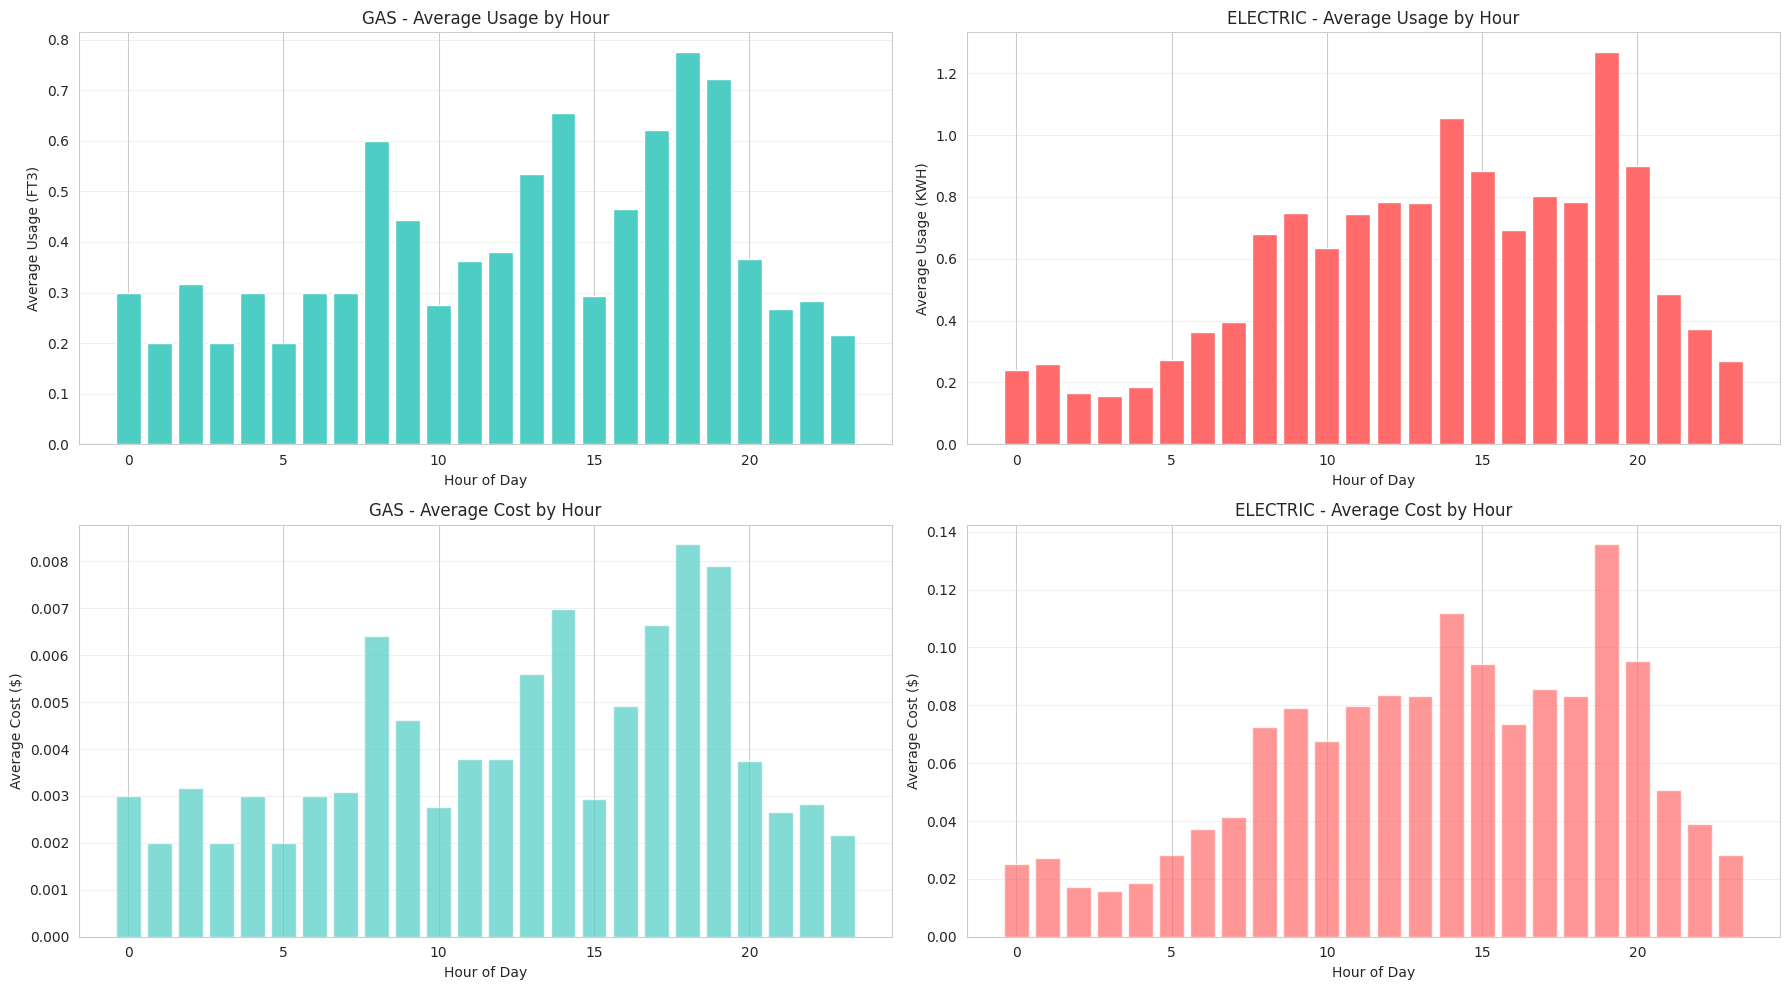

In [30]:
# Load both usage and cost data
usage_df = storage.read_usage_data(data_type="USAGE")
cost_data = storage.read_usage_data(data_type="COST")

print("=== Top 10 Usage Periods by Utility ===\n")

for utility in usage_df["utility_type"].unique():
    utility_data = usage_df[usage_df["utility_type"] == utility].copy()
    top_10 = utility_data.nlargest(10, "usage_value")[
        ["datetime_utc", "usage_value", "unit_of_measure", "hour"]
    ]

    print(f"\n{utility}:")
    print(top_10.to_string(index=False))

    # Hour of day analysis
    print("\nAverage usage by hour of day:")
    hourly_avg = (
        utility_data.groupby("hour")["usage_value"].mean().sort_values(ascending=False)
    )
    print(hourly_avg.head(5))

print("\n\n=== Top 10 Cost Periods by Utility ===\n")

for utility in cost_data["utility_type"].unique():
    utility_cost = cost_data[cost_data["utility_type"] == utility].copy()
    top_10_cost = utility_cost.nlargest(10, "usage_value")[
        ["datetime_utc", "usage_value", "hour"]
    ]
    top_10_cost = top_10_cost.rename(columns={"usage_value": "cost ($)"})

    print(f"\n{utility}:")
    print(top_10_cost.to_string(index=False))

# Visualize peak hours for usage
fig, axes = plt.subplots(2, len(usage_df["utility_type"].unique()), figsize=(18, 10))
if len(usage_df["utility_type"].unique()) == 1:
    axes = axes.reshape(-1, 1)

for idx, utility in enumerate(usage_df["utility_type"].unique()):
    # Usage by hour
    utility_usage = usage_df[usage_df["utility_type"] == utility]
    hourly_avg_usage = utility_usage.groupby("hour")["usage_value"].mean()
    unit = utility_usage["unit_of_measure"].iloc[0]

    axes[0, idx].bar(
        hourly_avg_usage.index,
        hourly_avg_usage.values,
        color=colors.get(utility, "#95E1D3"),
    )
    axes[0, idx].set_title(f"{utility} - Average Usage by Hour")
    axes[0, idx].set_xlabel("Hour of Day")
    axes[0, idx].set_ylabel(f"Average Usage ({unit})")
    axes[0, idx].grid(axis="y", alpha=0.3)

    # Cost by hour
    utility_cost = cost_data[cost_data["utility_type"] == utility]
    hourly_avg_cost = utility_cost.groupby("hour")["usage_value"].mean()

    axes[1, idx].bar(
        hourly_avg_cost.index,
        hourly_avg_cost.values,
        color=colors.get(utility, "#95E1D3"),
        alpha=0.7,
    )
    axes[1, idx].set_title(f"{utility} - Average Cost by Hour")
    axes[1, idx].set_xlabel("Hour of Day")
    axes[1, idx].set_ylabel("Average Cost ($)")
    axes[1, idx].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()